<a href="https://colab.research.google.com/github/Gmartinica/stock-forecasting/blob/main/stock_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data preprocessing (getting news data)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Getting news data source: https://www.kaggle.com/datasets/rmisra/news-category-dataset

In [2]:
!gdown 1TkLOps0qxeKKqigID_GMB4xe9mWgsaKn

Downloading...
From: https://drive.google.com/uc?id=1TkLOps0qxeKKqigID_GMB4xe9mWgsaKn
To: /content/huffpost_news.json
100% 87.3M/87.3M [00:02<00:00, 36.2MB/s]


In [3]:
with open('huffpost_news.json', encoding='utf-8') as inputfile:
    huff_news = pd.read_json(inputfile, lines=True)

In [4]:
display(huff_news)

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
...,...,...,...,...,...,...
209522,https://www.huffingtonpost.com/entry/rim-ceo-t...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28


In [5]:
# Clean up by filtering only news where category is US news and keep only headline, short_description and date rows
huff_news_clean = huff_news.loc[huff_news['category'].isin(["U.S. NEWS", "WORLD NEWS"])]

In [6]:
huff_news_clean = huff_news_clean.drop(['link', 'category', 'authors'], axis=1)

In [7]:
huff_news_clean['date'] = pd.to_datetime(huff_news_clean['date'], utc=True)
huff_news_clean['date'] = huff_news_clean['date'].dt.strftime('%Y-%m-%d')

In [8]:
huff_news_clean = huff_news_clean.groupby('date').agg({'headline': lambda x: '\n'.join(x), 'short_description': lambda x: '\n'.join(x)}).reset_index()

In [9]:
display(huff_news_clean)

,date,headline,short_description
0,2017-04-09,What You Need To Know About North Korea's Nucl...,Experts say the country's nuclear weapons test...
1,2017-05-20,Trump’s Counter-Extremism Effort Should Addres...,The president will have to address incitement ...
2,2017-05-21,The Riyadh Summits: A Workshop For A Global Fr...,Donald Trump’s presidency is currently undergo...
3,2017-05-22,Don't Be Fooled: Iran's Newly Elected Hassan R...,"Don’t be fooled.\nGeorges Fahmi, European Univ..."
4,2017-05-23,#RoomForManchester Hashtag Helps Shelter Stran...,"""When terrorism makes you question humanity, l..."
...,...,...,...
1209,2022-09-19,Hurricane Fiona Bears Down On Dominican Republ...,The storm knocked out the power grid and unlea...
1210,2022-09-20,Russian Cosmonaut Valery Polyakov Who Broke Re...,Polyakov's record-breaking trip to outer space...
1211,2022-09-21,Biden At UN To Call Russian War An Affront To ...,White House officials say the crux of the pres...
1212,2022-09-22,Woman Who Called Cops On Black Bird-Watcher Lo...,Amy Cooper accused investment firm Franklin Te...


In [10]:
!gdown 1gpIXF8aszwj2stBomkbNLds9O0zI8bH0

Downloading...
From: https://drive.google.com/uc?id=1gpIXF8aszwj2stBomkbNLds9O0zI8bH0
To: /content/stock_news.csv
100% 170M/170M [00:01<00:00, 93.8MB/s]


In [11]:
with open('stock_news.csv', encoding='utf-8') as inputfile:
    stock_df = pd.read_csv(inputfile)

In [12]:
# errors coerce because there 2578 rows with wrong/missing values in the date column value 
stock_df['date'] = pd.to_datetime(stock_df['date'], errors='coerce')

In [13]:
# Remove rows containing n/a in date because there 2578 rows with wrong/missing values in the date column value
na_rows = stock_df[stock_df['date'].isna()]
print("Number of rows with errors: " + str(len(na_rows)))
stock_df = stock_df.drop(na_rows.index)

Number of rows with errors: 2578


In [14]:
stock_df['date'] = pd.to_datetime(stock_df['date'], errors='coerce', utc=True)

In [15]:
# Change format to something like 2020-02-14
stock_df['formatted_date'] = stock_df['date'].dt.strftime('%Y-%m-%d')

In [16]:
# Remove unnecesary columns
stock_df_clean = stock_df.drop(['Unnamed: 0.1', 'Unnamed: 0', 'date', 'stock'], axis=1)

In [17]:
stock_df_clean = stock_df_clean.rename(columns={'formatted_date': 'date'})

In [18]:
len(stock_df_clean)

1397891

In [19]:
stock_cleaned_final = stock_df_clean.groupby('date')['title'].agg(lambda x: '\n'.join(x)).reset_index()

In [20]:
stock_cleaned_final

,date,title
0,2009-02-14,How Treasuries and ETFs Work
1,2009-04-27,Update on the Luxury Sector: 2nd Quarter 2009\...
2,2009-04-29,Going Against the Herd
3,2009-05-22,Charles Sizemore Radio Interview Saturday Morning
4,2009-05-27,"JVA perks to 39% gain, SMCG ready, MRM to cont..."
...,...,...
3954,2020-06-07,Apple's Top Supplier Foxconn Launched New Recr...
3955,2020-06-08,Shares of several retail and apparel companies...
3956,2020-06-09,Why Apple's Stock Is Trading Higher Today\nApp...
3957,2020-06-10,Shares of retail & apparel companies are tradi...


In [21]:
# Get final news column for sentiment analysis
merged_news = pd.merge(huff_news_clean, stock_cleaned_final, on='date', how='outer')
# Sort based on date
merged_news = merged_news.sort_values('date')
merged_news = merged_news.reset_index(drop=True)

In [22]:
# Start from 2012
begin_date = merged_news[merged_news['date'] == '2012-01-01'].index[0]
merged_news = merged_news.iloc[begin_date:]
# replace NaN values with empty strings
merged_news = merged_news.fillna('')
merged_news['date'] = pd.to_datetime(merged_news['date'])
merged_news.set_index('date', inplace=True)
display(merged_news)


,headline,short_description,title
date,,,
2012-01-01,,,Is 2012 Going To Be a Repeat of 2011?\nIs 2012...
2012-01-02,,,Earnings Expectations for the Week of January ...
2012-01-03,,,UPDATE: Deutsche Bank Initiates Coverage on Ad...
2012-01-04,,,JP Morgan Adds Agilent Technologies to Analyst...
2012-01-05,,,"End-of-Day Market Summary for January 5, 2012\..."
...,...,...,...
2022-09-19,Hurricane Fiona Bears Down On Dominican Republ...,The storm knocked out the power grid and unlea...,
2022-09-20,Russian Cosmonaut Valery Polyakov Who Broke Re...,Polyakov's record-breaking trip to outer space...,
2022-09-21,Biden At UN To Call Russian War An Affront To ...,White House officials say the crux of the pres...,


In [23]:
# merged_news.to_csv('merged.csv', encoding = 'utf-8-sig') 
# from google.colab import files
# files.download("merged.csv")

## Natural language processing

In [24]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

The basic idea would be to go to each row in the dataframe and read the headline, short_description and title. Combine them to get one single sentence and perform sentiment analysis using NLTK VADER (Valence Aware Dictionary and sEntiment Reasoner).
At the beginning I was thinking of using AFINN, but AFINN is just a list of words labeled as to how positive or negative they are and then it gets the average sentiment of a sentence. 

Vader, on the other hand takes into account the context of the sentence as well as structure. Moreover, it is trained on social media data which is by default short sentences similar to the sentences I have for my data. Lastly, it is more efficient and faster than AFINN.

In [25]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Define function to pass through dataframe
def calculate_sentiment_score(row, analyzer):
    combined_text = f"{row['headline']} {row['short_description']} {row['title']}"
    sentiment = analyzer.polarity_scores(combined_text)
    score = 0
    if sentiment['compound'] > 0.1:
      score = 1
    elif sentiment['compound'] < -0.1:
      score = -1
    # Map values as we get values like -0.9432 which can be simplified as we are
    # not trying to predict sentiment scores, just a reference in our data
    return score

In [26]:
# Apply function to each row in the dataframe
merged_news['sentiment_score'] = merged_news.apply(calculate_sentiment_score, analyzer=sia, axis=1)

In [27]:
# from google.colab import files

# merged_news[['sentiment_score', 'date']].to_csv('final.csv', encoding = 'utf-8-sig') 
# files.download("final.csv")

In [28]:
# Some values are missing so let's keep it daily and do forward filling
merged_news = merged_news.resample('D').ffill()

We can get an idea of how the sentiment news analysis looks over time, here is some code that takes the yearly average of the sentiment scores and plots it.
As you will see interestingly, there is a sharp decline of positivity starting from end of 2019 and beginning of 2020, just when our friend COVID-19 entered the chat.

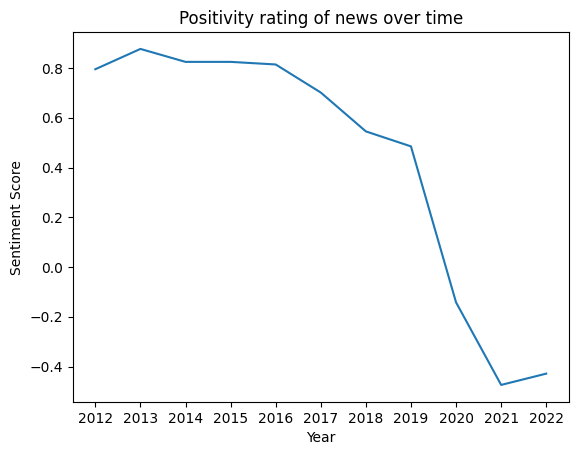

In [29]:
yearly_sentiment = merged_news['sentiment_score'].resample('Y').mean()
yearly_sentiment.index = yearly_sentiment.index.strftime('%Y')
plt.plot(yearly_sentiment.index, yearly_sentiment.values)
plt.title('Positivity rating of news over time')
plt.xlabel('Year')
plt.ylabel('Sentiment Score')
plt.show()

# Macroeconomic indicators
According to this research paper: https://www.sciencedirect.com/science/article/abs/pii/S0378426608001544 
Macroeconomic indicators are important variables to take into account when predicting the stock market. More importantly, it defines that during bear markets (recessions) interest rates and yield spreads (difference between the yields of government bonds, with different maturities) are empirically the most important factors to consider and makes it easier to predict recessions in the stock market. Furthermore, other factors are also important during times other than recession. For example: GDP and Consumer Price Index (inflation rate). We will be analyzing these factors to take them into our model.

I found some APIs to automatically extract this data from the US Bureau of Labor Statistics and the Federal Reserve Economic Data, both truthful and official resources for getting accurate historic economic data. However, that would involve sharing my API key and also a lot more code that is not necessarily relevant to the purpose of the project. As a result, I just did the process of extracting the GDP, inflation rate, interest rate, and yield curves during these times periods.
Sources: 
https://fred.stlouisfed.org/series/CPIAUCSL
https://www.bls.gov/cpi/

In [30]:
!gdown 1mvoxR7o6lfmg75vBUDN6rLoeUv--me0l
!gdown 1COss6xkVysE5c9DPfhVDB4tEJxDoH8VU
!gdown 1MBTrKo9djOstwcmeFVjdqSo9_78hpzll
!gdown 1pfK7uDdtHHHlrClqEPDHtBcmluNZH-YN

Downloading...
From: https://drive.google.com/uc?id=1mvoxR7o6lfmg75vBUDN6rLoeUv--me0l
To: /content/CPI.csv
100% 2.46k/2.46k [00:00<00:00, 5.34MB/s]
Downloading...
From: https://drive.google.com/uc?id=1COss6xkVysE5c9DPfhVDB4tEJxDoH8VU
To: /content/FEDFUNDS.csv
100% 2.08k/2.08k [00:00<00:00, 4.31MB/s]
Downloading...
From: https://drive.google.com/uc?id=1MBTrKo9djOstwcmeFVjdqSo9_78hpzll
To: /content/GDP.csv
100% 945/945 [00:00<00:00, 2.09MB/s]
Downloading...
From: https://drive.google.com/uc?id=1pfK7uDdtHHHlrClqEPDHtBcmluNZH-YN
To: /content/T10Y2Y.csv
100% 44.4k/44.4k [00:00<00:00, 63.9MB/s]


In [31]:
filenames = ['CPI.csv', 'FEDFUNDS.csv', 'T10Y2Y.csv', 'GDP.csv']
macroecon_dataframes = []
for filename in filenames: 
  with open(filename, encoding='utf-8') as inputfile:
    df = pd.read_csv(inputfile)
    macroecon_dataframes.append(df)

In [32]:
# Modify yield_spread because it contains some non numeric values
macroecon_dataframes[2]['T10Y2Y'] = pd.to_numeric(macroecon_dataframes[2]['T10Y2Y'], errors='coerce')
macroecon_dataframes[2] = macroecon_dataframes[2].fillna(method='ffill')

macroecon_dataframes[2]

,DATE,T10Y2Y
0,2012-01-03,1.70
1,2012-01-04,1.75
2,2012-01-05,1.75
3,2012-01-06,1.73
4,2012-01-09,1.72
...,...,...
2794,2022-09-19,-0.46
2795,2022-09-20,-0.39
2796,2022-09-21,-0.51
2797,2022-09-22,-0.41


Since many of these values are not given daily but rather as monthly or quarterly averages, we need to convert them to daily. We can perform forward filling to fill the missing values in the daily timesteps.

In [33]:
def forward_fill(df, name):
  """Given a dataframe with columns date and value, returns the forward fill of the values in daily format"""
  # convert date column to datetime format and set it as index
  df['DATE'] = pd.to_datetime(df['DATE'])
  df.set_index('DATE', inplace=True)

  # resample the data to daily frequency and forward fill the missing values
  df = df.resample('D').ffill()

  # # reset the index and rename the columns
  df = df.reset_index()
  df.rename(columns={ df.columns[0]: "date", df.columns[1]: name }, inplace = True)
  return df

In [34]:
column_names = ["inflation_rate", "interest_rate", "yield_spread", "gdp"]

for i in range(len(column_names)):
  macroecon_dataframes[i] = forward_fill(macroecon_dataframes[i], column_names[i])

# Downloading financial stock data
Now that we have the sentiment analysis scores in the range +1 for positivity, 0 neutral and -1 for negativity, we can start downloading the stock data from the companies we are interested in. In our case, we are going to download the stock data from Yahoo Finance as it gives us historial data for free and also there is an easy to use API library which gives us easy access to it. 

In [35]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
import yfinance as yf
# Companies
company_list = ['msft', 'pfe', 'wmt', 'ko', 'qcom', 'gs', 'nvda', 'amzn', 'nke', 'v']

# For each company download the data in that date range and append to a list
stock_list = []
for company in company_list:
    data = yf.download(company, start="2012-01-03", end="2022-08-31")
    stock_list.append(data)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## Mixing all the datasets together

In [37]:
# Get sentiment score
merged_news = merged_news.reset_index()


In [38]:
dataset = merged_news.loc[:, ['date', 'sentiment_score']]
for df in macroecon_dataframes:
  dataset = pd.merge(dataset, df, on='date', how='outer')

In [39]:
dataset['date'] = pd.to_datetime(dataset['date'])

# sort the dataframe by date
dataset = dataset.sort_values('date')

# slice the dataframe between specific dates
start_date = '2012-01-03'
end_date = '2022-08-31'
dataset = dataset.loc[(dataset['date'] >= start_date) & (dataset['date'] <= end_date)]

In [40]:
dataset.set_index('date', inplace=True)

# We can visualize macroeconomic variables 

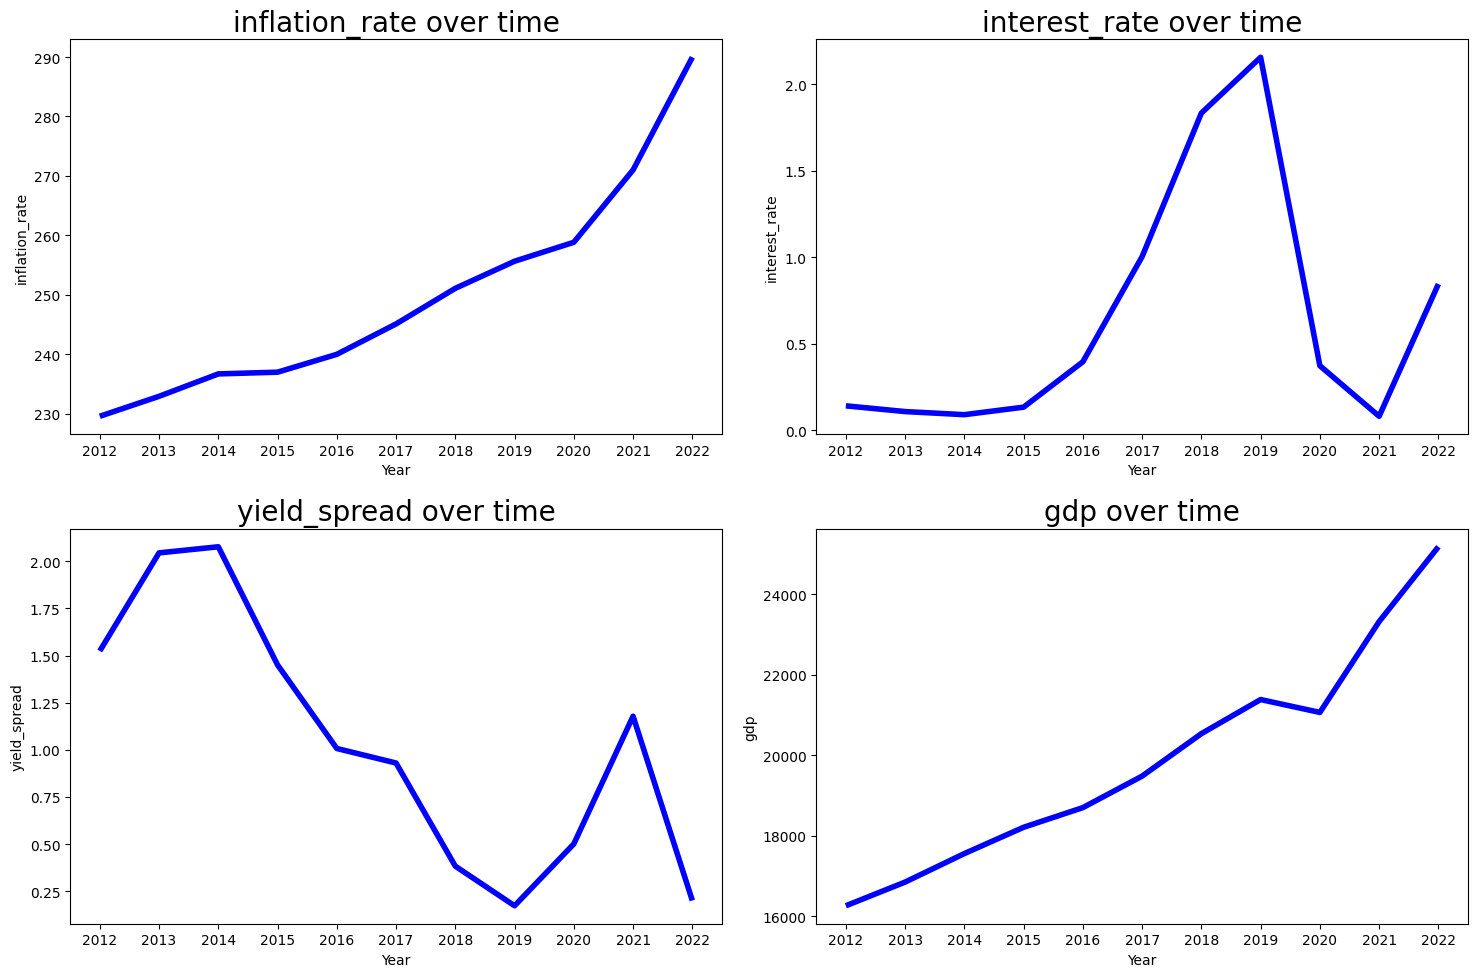

In [41]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
plt.style.use('fivethirtyeight')
# loop over the columns and plot the yearly values
for i, col in enumerate(column_names):
    row = i // 2
    column = i % 2
    yearly_sentiment = dataset[col].resample('Y').mean()
    yearly_sentiment.index = yearly_sentiment.index.strftime('%Y')
    axs[row, column].plot(yearly_sentiment.index, yearly_sentiment.values, color='b')
    axs[row, column].set_title(f'{col} over time')
    axs[row, column].set_xlabel('Year')
    axs[row, column].set_ylabel(f'{col}')

# adjust the layout of the plots
plt.tight_layout()

# show the plots
plt.show()

In [42]:
dataset.reset_index(inplace=True)
for i in range(len(stock_list)):
  stock_list[i].reset_index(inplace=True) 
  stock_list[i].rename(columns={"Date": "date"}, inplace=True)

In [43]:
data = []
# Merge this dataset for each company
for i in range(len(stock_list)):
  merged = stock_list[i].merge(dataset, on='date', how='left')
  data.append(merged)

# Actual machine learning. Set up model and start training and testing

In [44]:
import torch
import torch.nn as nn
import time
from torch.utils.tensorboard import SummaryWriter
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt

In [45]:
# Separate training and label data
X = {}
y = {}
for i, company in enumerate(company_list):
  X[company] = data[i].drop(columns=['date', 'Close'])
  y[company] = data[i][['Close', 'date']]

In [81]:
window_size = 10
step_size = 1
inputs = []
labels = []
for i in range (window_size, len(data[0]) - 5, step_size):
    inputs.append(data[0][i-window_size:i].drop(columns=['date', 'Close']))
    labels.append(data[0]['Close'][i:i+5,]) 

In [82]:
np.array(inputs).shape

(2668, 10, 10)

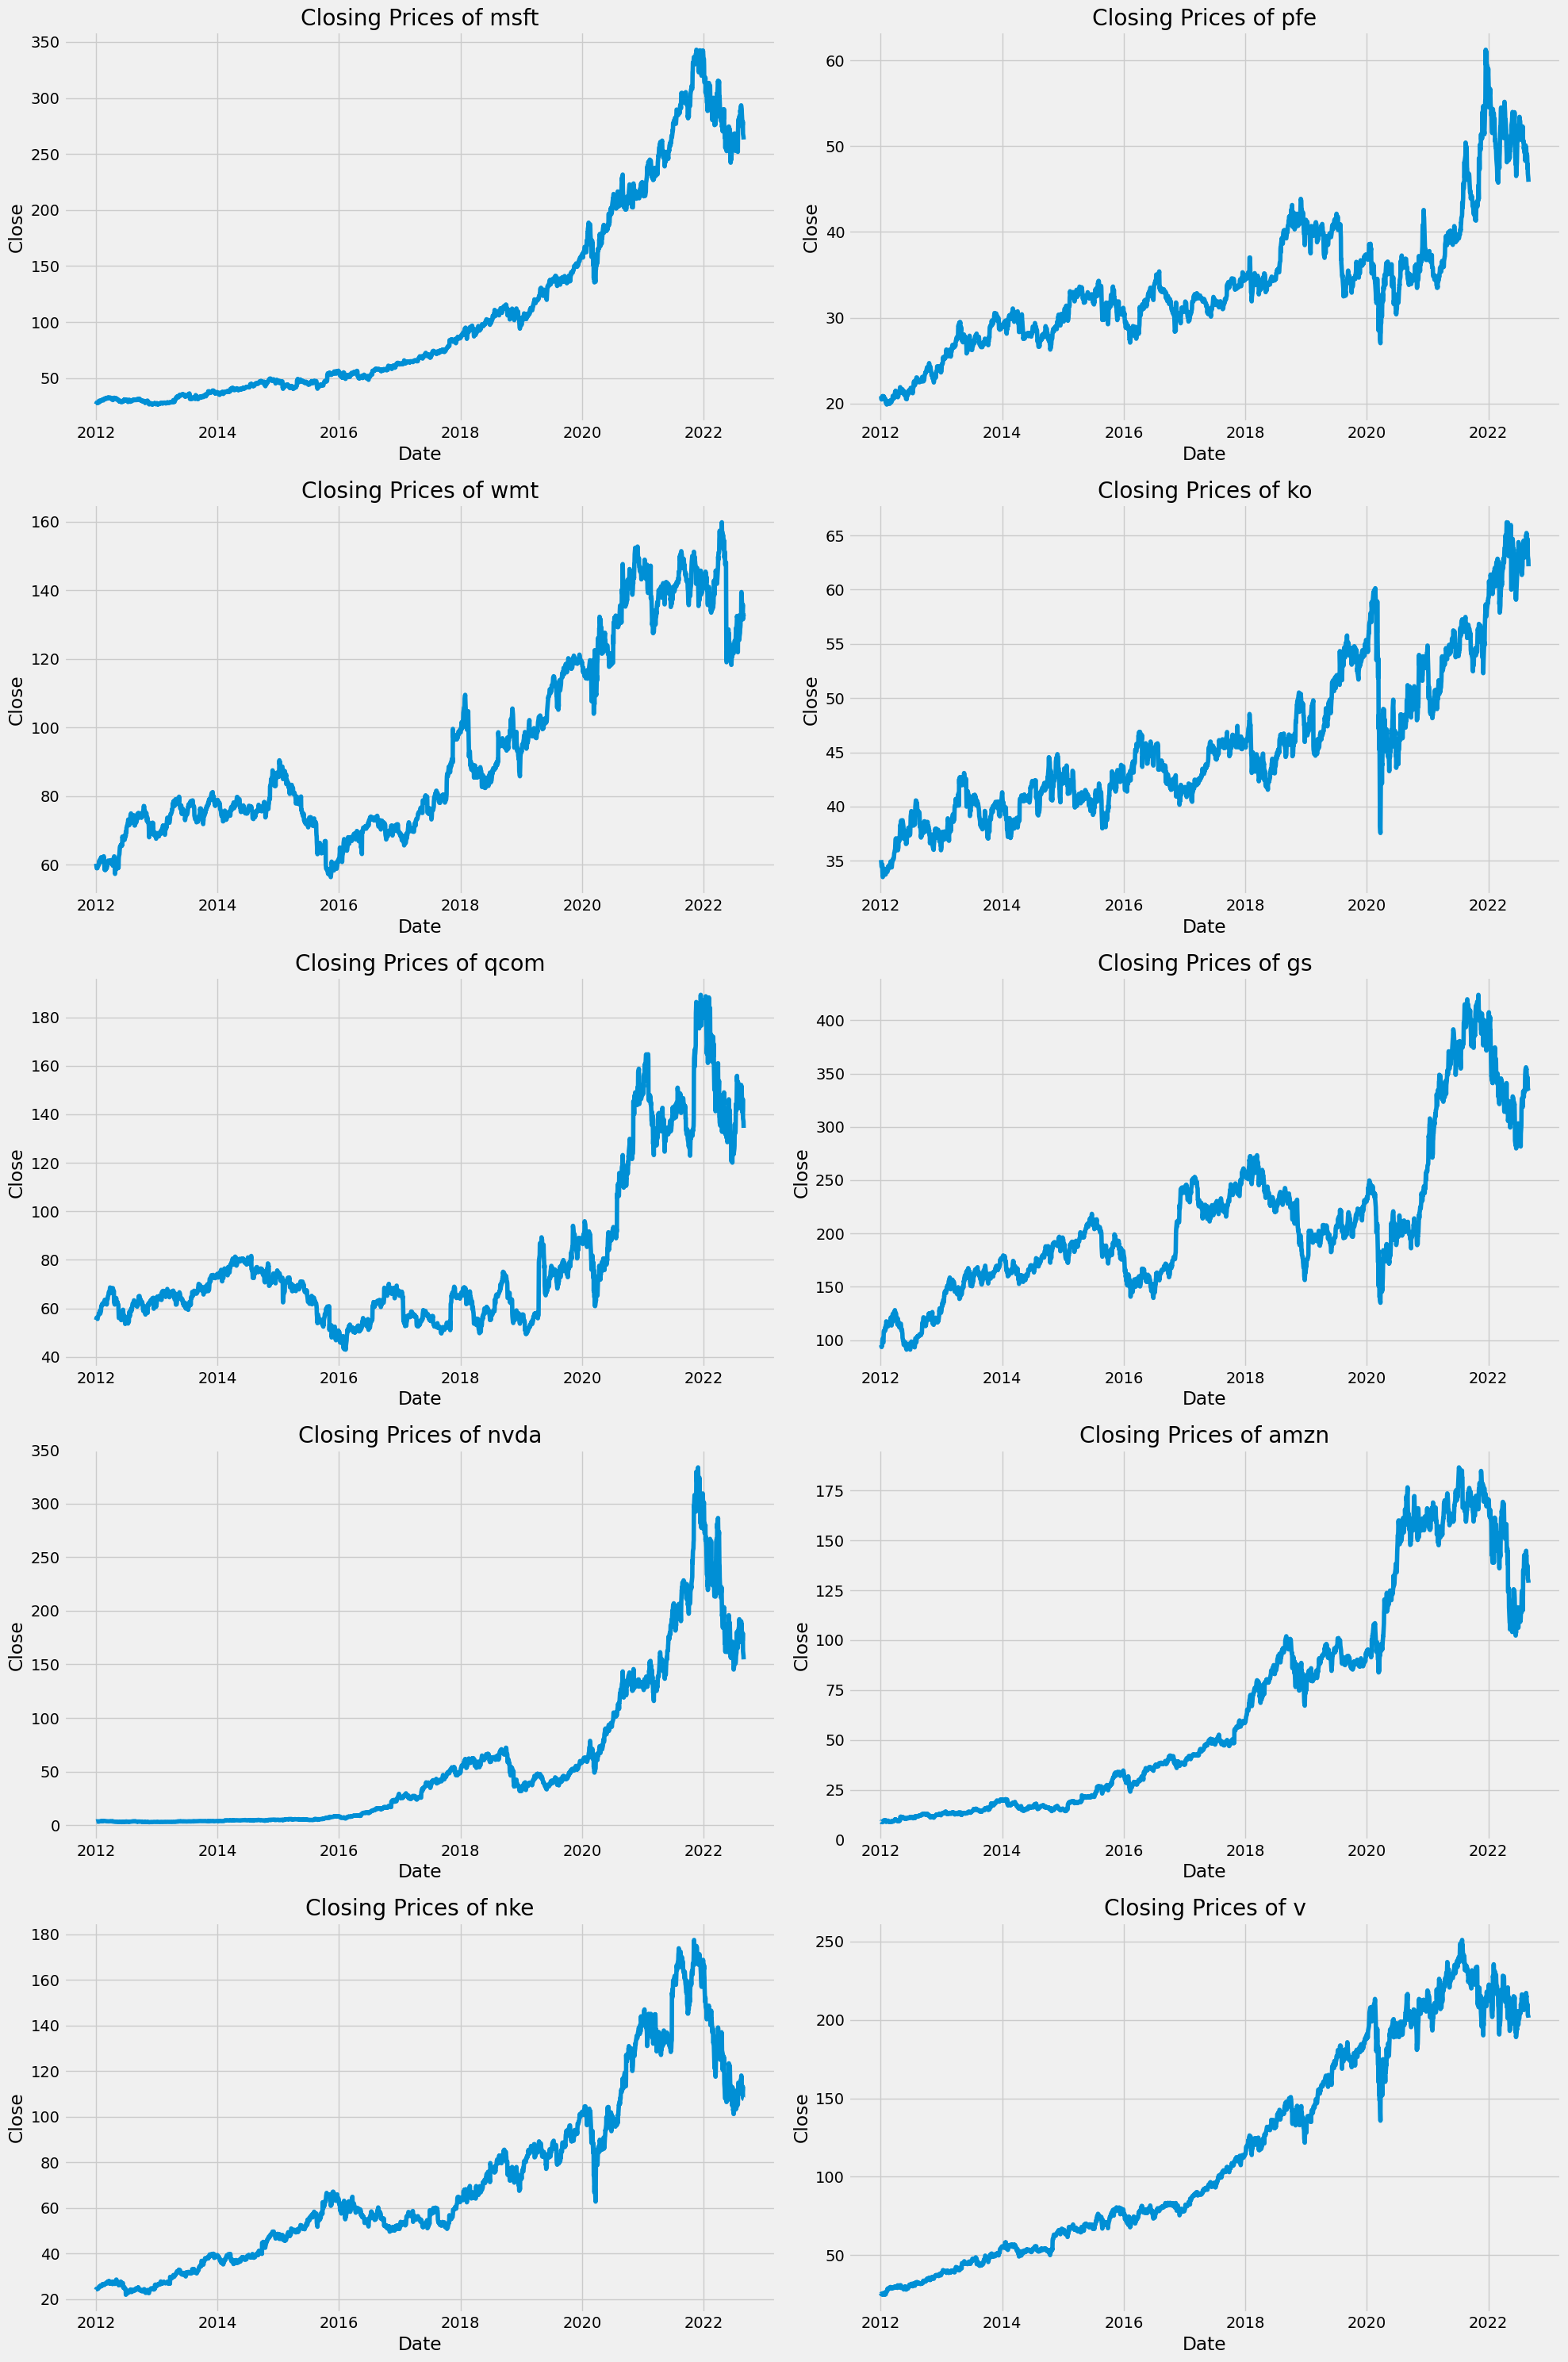

In [46]:
# VISUALIZATION OF PRICES
num_rows = 5
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 30))

# Loop over each DataFrame and plot it in a small subplot
for i, company in enumerate(company_list):
    
    # Compute the row and column indices for the subplot
    row = i // num_cols
    col = i % num_cols
    
    # Plot the 'Close' column against the 'Date' column in a small subplot
    ax = axes[row, col]
    ax.plot(y[company]['date'], y[company]['Close'])
    ax.set_xlabel('Date')
    ax.set_ylabel('Close')
    ax.set_title(f'Closing Prices of {company}')
    
# Adjust the layout of the subplots and display the figure
plt.tight_layout()
plt.show()

In [160]:
def split_data(data, training_split):
  """
  Splits the input data into training, validation, and test sets.
  It assumes both x and y have the same number of companies
  
  Parameters:
  - data: a list of dataframes of companies
  - training_split: an integer specifying the percentage of data to use for training
  
  Returns:
  - train_set: a dictionary containing the training data. 
  - validation_set: a dictionary containing the validation data
  - test_set: a dictionary containing the test data
  """
  scaler_list = []
    
  train_set, validation_set, test_set = ({'X': [], 'y': []} for _ in range(3))
  for i, company in enumerate(company_list):
      
    # Split the data into training, validation, and test sets
    length_data = len(data[i])
    training_index = int(training_split * length_data)
    test_samples = (length_data - training_index) // 2
    
    train_data = data[i].iloc[:training_index].drop(columns=['date'])
    validation_data = data[i].iloc[training_index:training_index + test_samples].drop(columns=['date'])
    test_data = data[i].iloc[training_index + test_samples:].drop(columns=['date'])

    print(len(train_data))
    print(len(validation_data))
    print(len(test_data))
    print(train_data)
    
    # Scale values
    scaler = MinMaxScaler()
    features = data[i].drop(columns=['date']).columns
    
    train_data[features] = scaler.fit_transform(train_data[features])
    validation_data[features] = scaler.transform(validation_data[features])
    test_data[features] = scaler.transform(test_data[features])
    print(train_data)
    
    # Create sequences of the data
    window_size = 10
    step_size = 1
    
    train_inputs = []
    train_labels = []
    for j in range(window_size, len(train_data) - 5, step_size):
        train_inputs.append(train_data.iloc[j - window_size:j].drop(columns=['Close']).values)
        train_labels.append(train_data['Close'].iloc[j:j + 5].values)
    
    validation_inputs = []
    validation_labels = []
    for j in range(window_size, len(validation_data) - 5, step_size):
        validation_inputs.append(validation_data.iloc[j - window_size:j].drop(columns=['Close']).values)
        validation_labels.append(validation_data['Close'].iloc[j:j + 5].values)
    
    test_inputs = []
    test_labels = []
    for j in range(window_size, len(test_data) - 5, step_size):
        test_inputs.append(test_data.iloc[j - window_size:j].drop(columns=['Close']).values)
        test_labels.append(test_data['Close'].iloc[j:j + 5].values)
    
    train_set['X'].append(np.array(train_inputs))
    train_set['y'].append(np.array(train_labels))
    
    validation_set['X'].append(np.array(validation_inputs))
    validation_set['y'].append(np.array(validation_labels))
    
    test_set['X'].append(np.array(test_inputs))
    test_set['y'].append(np.array(test_labels))
    
    scaler_list.append(scaler)
      
  return train_set, validation_set, test_set, scaler_list

train_set, validation_set, test_set, scaler_list = split_data(data, 0.7)

1878
402
403
            Open        High         Low       Close   Adj Close    Volume  \
0      26.549999   26.959999   26.389999   26.770000   21.413061  64731500   
1      26.820000   27.469999   26.780001   27.400000   21.916996  80516100   
2      27.379999   27.730000   27.290001   27.680000   22.140968  56081400   
3      27.530001   28.190001   27.530001   28.110001   22.484913  99455500   
4      28.049999   28.100000   27.719999   27.740000   22.188957  59706800   
...          ...         ...         ...         ...         ...       ...   
1873  132.259995  133.789993  131.639999  132.449997  127.583435  17821700   
1874  132.630005  133.729996  132.529999  132.850006  127.968727  14517800   
1875  134.190002  135.240005  133.570007  135.160004  130.193848  25934500   
1876  135.000000  135.929993  133.809998  135.690002  130.704376  23744400   
1877  137.449997  137.660004  135.720001  136.949997  131.918076  33042600   

      sentiment_score  inflation_rate  interest_ra

In [157]:
train_set['X'][1].shape

IndexError: ignored

In [119]:
# scaler = MinMaxScaler()
# features = data[0].columns.drop(['date']) #['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'sentiment_score','inflation_rate', 'interest_rate', 'yield_spread', 'gdp']
# scaled_data = scaler.fit_transform(data[0][features])
# print(scaled_data)

[[5.34188281e-04 1.02154504e-03 4.11467860e-04 ... 1.26582278e-02
  6.94267516e-01 0.00000000e+00]
 [1.38260602e-03 2.60029753e-03 1.64588352e-03 ... 1.26582278e-02
  7.10191083e-01 0.00000000e+00]
 [3.14228259e-03 3.40515210e-03 3.26011473e-03 ... 1.26582278e-02
  7.10191083e-01 0.00000000e+00]
 ...
 [7.94054772e-01 7.85382572e-01 7.65081983e-01 ... 9.62025316e-01
  4.77707006e-02 1.00000000e+00]
 [7.52482435e-01 7.45325607e-01 7.52009865e-01 ... 9.62025316e-01
  5.73248408e-02 1.00000000e+00]
 [7.55059129e-01 7.44242131e-01 7.41913004e-01 ... 9.62025316e-01
  4.14012739e-02 1.00000000e+00]]


In [161]:
# Print dimensions to understand how data is divided
for i, company in enumerate(company_list):
  dimensions = f"{company} -> Train:{train_set['X'][i].shape} Labels:{train_set['y'][i].shape}" \
               f" Validation:{validation_set['X'][i].shape} Labels:{validation_set['y'][i].shape}" \
               f" Test:{test_set['X'][i].shape} Labels:{test_set['y'][i].shape}" 
  print(dimensions)

msft -> Train:(1863, 10, 10) Labels:(1863, 5) Validation:(387, 10, 10) Labels:(387, 5) Test:(388, 10, 10) Labels:(388, 5)
pfe -> Train:(1863, 10, 10) Labels:(1863, 5) Validation:(387, 10, 10) Labels:(387, 5) Test:(388, 10, 10) Labels:(388, 5)
wmt -> Train:(1863, 10, 10) Labels:(1863, 5) Validation:(387, 10, 10) Labels:(387, 5) Test:(388, 10, 10) Labels:(388, 5)
ko -> Train:(1863, 10, 10) Labels:(1863, 5) Validation:(387, 10, 10) Labels:(387, 5) Test:(388, 10, 10) Labels:(388, 5)
qcom -> Train:(1863, 10, 10) Labels:(1863, 5) Validation:(387, 10, 10) Labels:(387, 5) Test:(388, 10, 10) Labels:(388, 5)
gs -> Train:(1863, 10, 10) Labels:(1863, 5) Validation:(387, 10, 10) Labels:(387, 5) Test:(388, 10, 10) Labels:(388, 5)
nvda -> Train:(1863, 10, 10) Labels:(1863, 5) Validation:(387, 10, 10) Labels:(387, 5) Test:(388, 10, 10) Labels:(388, 5)
amzn -> Train:(1863, 10, 10) Labels:(1863, 5) Validation:(387, 10, 10) Labels:(387, 5) Test:(388, 10, 10) Labels:(388, 5)
nke -> Train:(1863, 10, 10) La

range(1878, 2280)


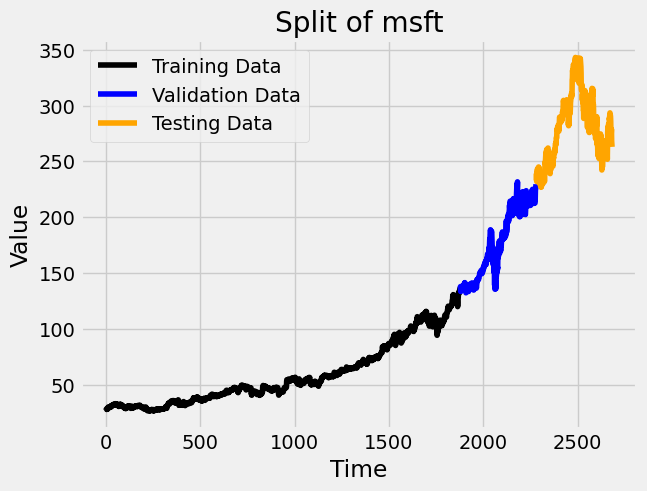

range(1878, 2280)


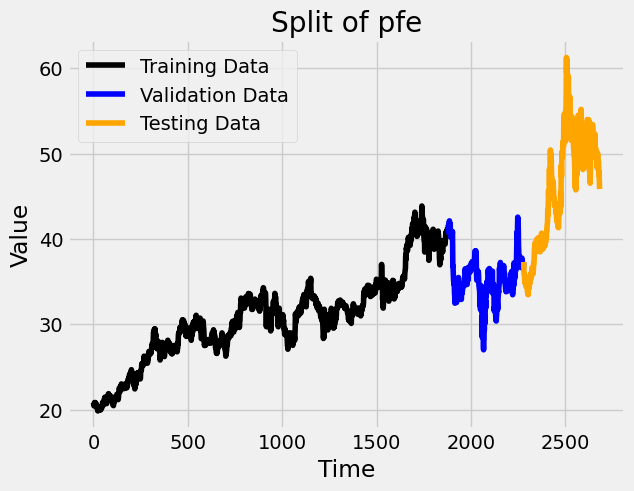

range(1878, 2280)


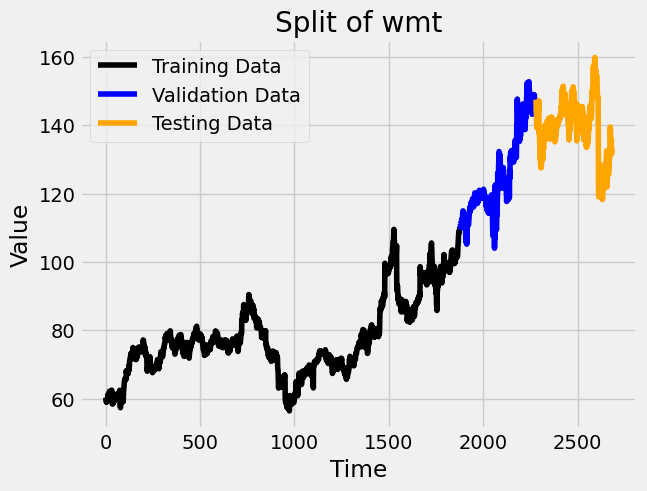

range(1878, 2280)


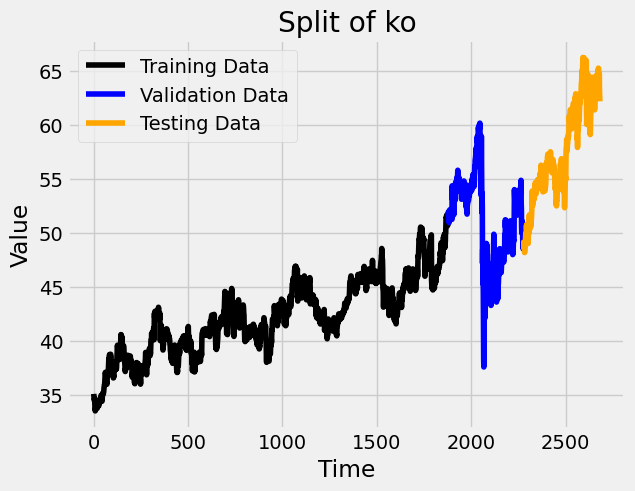

range(1878, 2280)


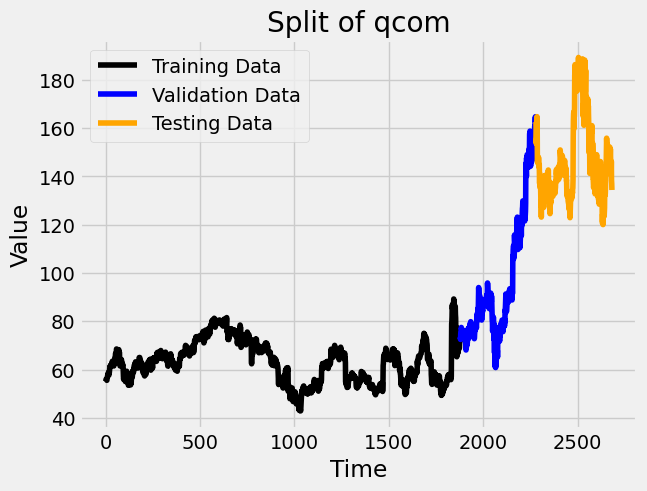

range(1878, 2280)


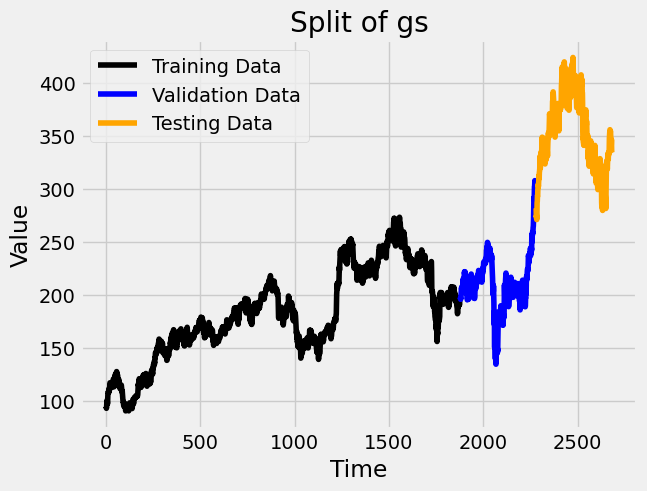

range(1878, 2280)


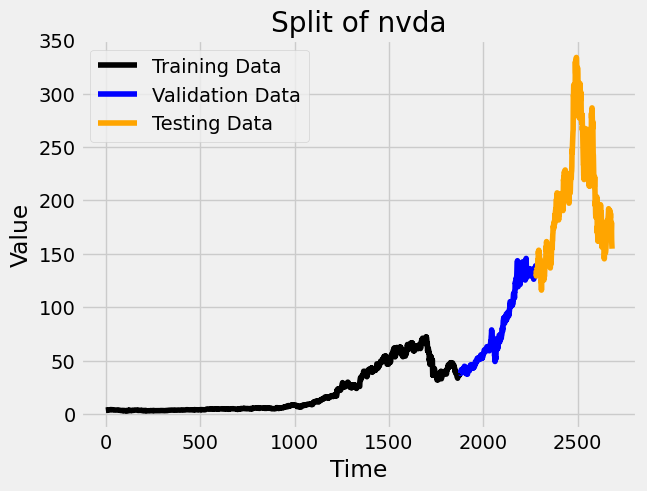

range(1878, 2280)


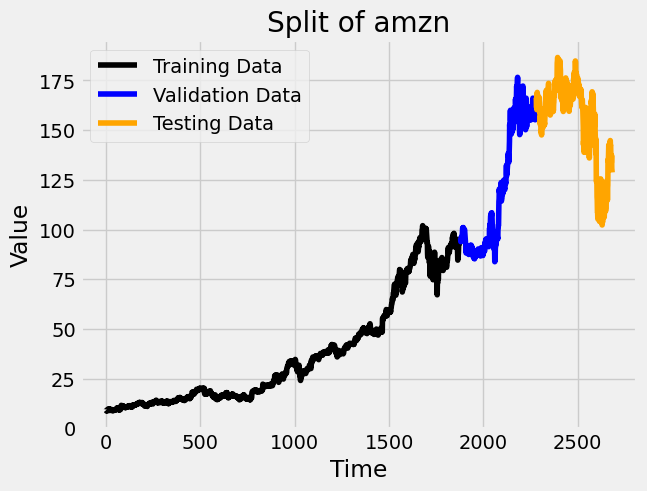

range(1878, 2280)


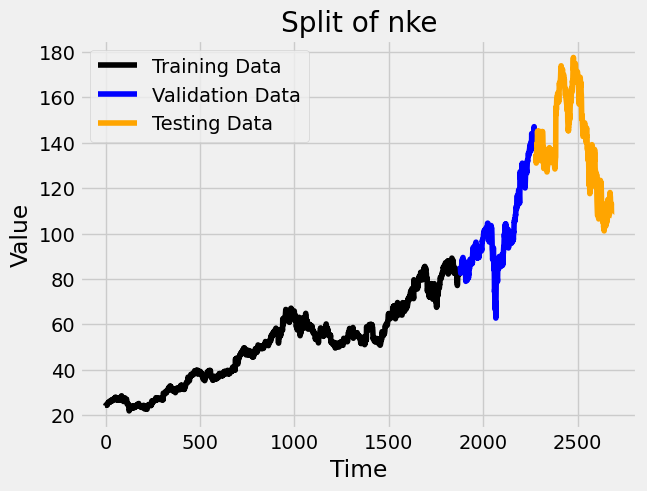

range(1878, 2280)


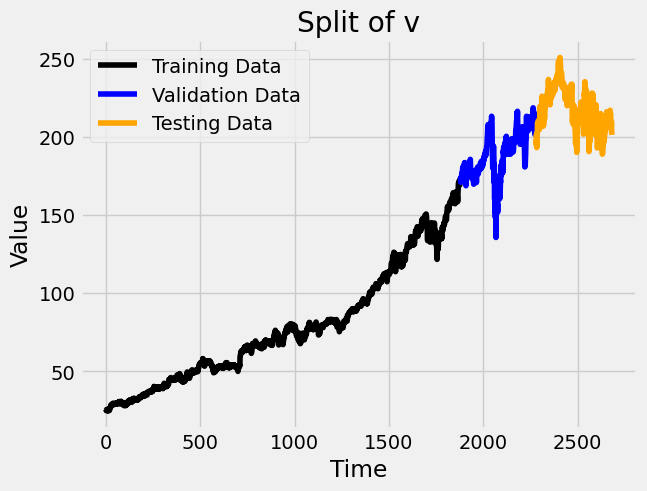

In [49]:
# Plot the split of training data
for i, company in enumerate(company_list):
  x_time = range(train_set['y'][i].shape[0])
  y_time = range(train_set['y'][i].shape[0], train_set['y'][i].shape[0]+validation_set['y'][i].shape[0])
  z_time = range(train_set['y'][i].shape[0] + validation_set['y'][i].shape[0], train_set['y'][i].shape[0] + test_set['y'][i].shape[0] + validation_set['y'][i].shape[0])
  print(y_time)

  plt.plot(x_time, train_set['y'][i][:], color='black', label='Training Data')
  plt.plot(y_time, validation_set['y'][i][:], color='blue', label='Validation Data')
  plt.plot(z_time, test_set['y'][i][:], color='orange', label='Testing Data')
  plt.title(f"Split of {company}")
  plt.legend()
  plt.xlabel('Time')
  plt.ylabel('Value')
  plt.show()

In [50]:
def scale_data(train_set, validation_set, test_set, company_list):
  scaled_train_set = {'X': [], 'y': []}
  scaled_validation_set = {'X': [], 'y': []}
  scaled_test_set = {'X': [], 'y': []}
  scaler_dict = {'X': [], 'y': []}
  scaled_data = {'X': [], 'y': []}
  for i in range(len(company_list)):
    # Get scalers
    scaler_train = MinMaxScaler()
    scaler_labels = MinMaxScaler()
    # Scale training set
    scaled_train_set['X'].append(scaler_train.fit_transform(train_set['X'][i]))
    scaled_train_set['y'].append(scaler_labels.fit_transform(train_set['y'][i].reshape(-1,1))) # scaler expects 2D vector
    
    # Apply learned transformation of training set to both validation and testing
    scaled_validation_set['X'].append(scaler_train.transform(validation_set['X'][i]))
    scaled_validation_set['y'].append(scaler_labels.transform(validation_set['y'][i].reshape(-1,1))) # scaler expects 2D vector

    scaled_test_set['X'].append(scaler_train.transform(test_set['X'][i]))
    scaled_test_set['y'].append(scaler_labels.transform(test_set['y'][i].reshape(-1,1))) # scaler expects 2D vector

    scaler_dict['X'].append(scaler_train)
    scaler_dict['y'].append(scaler_labels)

  return scaled_train_set, scaled_validation_set, scaled_test_set, scaler_dict

train_set, validation_set, test_set, scaler_list = scale_data(train_set, validation_set, test_set, company_list)

In [51]:
# # Lets start with one company 
# X = data[0].drop(columns=['date', 'Close'])
# y = data[0]['Close']

In [52]:
# # Split data sequentially
# split_ratio = 0.7
# split_index = int(len(X) * split_ratio)
# X_train = X[:split_index]
# X_test = X[split_index:]
# y_train = y[:split_index]
# y_test = y[split_index:]

In [53]:
# # Normalize input 
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [54]:
# # Convert to tensor and send to GPU
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# X_train = torch.from_numpy(X_train)
# y_train = torch.from_numpy(y_train.values)
# X_train.to(device)
# y_train.to(device)

In [55]:
# sequence_length = X_train.shape[0]
# input_size = X_train.shape[1]

# reshaped_tensor = X_train.view(sequence_length, 1, input_size)
# reshaped_tensor.to(device)


In [56]:
# FOR PURPOSE OF TESTING
# Tensor shape: (Number of samples, sequence length, number of features)
# Tensor expected: (Number of days of stock, how many days in parallel to analyze, number of columns in dataset)
dum_data = np.array(data[0]['Close'])
tr = dum_data[:int(len(X) * 0.8)]
ts = dum_data[int(len(X) * 0.8):]

tr = scaler.fit_transform(tr.reshape(-1,1))
ts = scaler.transform(ts.reshape(-1,1))

NameError: ignored

In [ ]:
def transform_sequence(x, seq_len):
    # Calculate the number of sequences
    num_seqs = len(x) - seq_len + 1

    # Create a 2D array of indices for selecting the elements of x
    idx = np.arange(seq_len)[None, :] + np.arange(num_seqs)[:, None]

    # Use the indices to select the elements of x and reshape the result
    data = x[idx].reshape(num_seqs, seq_len, 1)

    return data
tra = transform_sequence(tr, seq_len=1)
tra_y = tra[:, 0]

In [ ]:
def plot_variables_over_time(x, y):
    x_time = range(x.shape[0])
    y_time = range(x.shape[0], x.shape[0]+y.shape[0])
    plt.plot(x_time, x[:, 0], color='black')
    plt.plot(y_time, y[:, 0], color='blue')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.show()
#plot_variables_over_time(tr.reshape(-1,1),ts)

In [ ]:
tra = torch.from_numpy(tra)
tra_y = torch.from_numpy(tra_y)
ts = torch.from_numpy(ts)
ts = transform_sequence(ts, seq_len=1)
ts_y = ts[:, 0]
ts = ts.to(device)
ts_y = ts_y.to(device)
tra = tra.to(device)
tra_y = tra_y.to(device)

In [ ]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTM, self).__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, dropout=0.1, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).requires_grad_().to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).requires_grad_().to(device)
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :]) 
        return out

In [ ]:
input_size = 1
hidden_size = 25
num_layers = 1
output_size = 1

model = LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, output_size=output_size)
model.to(device)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)



In [ ]:
%%time
writer = SummaryWriter()
num_epochs = 150
hist = np.zeros(num_epochs)
hist_test = np.zeros(num_epochs)
tra_y = tra_y.float()

for t in range(num_epochs):
    y_train_pred = model(tra.float())
    test_pred = model(ts.float())

    print(y_train_pred.shape)

    loss = criterion(y_train_pred, tra_y)
    test_loss = criterion(test_pred, ts_y)
    print("Epoch ", t, " TrainMSE: ", loss.item(), " TetMSE: ", test_loss.item())
    hist[t] = loss.item()
    hist_test[t] = test_loss.item()
    loss = loss.float()
    writer.add_scalar('Loss/train', loss.item(), t)
    writer.add_scalar('Loss/test', test_loss.item(), t)
    for name, param in model.named_parameters():
      writer.add_histogram(name, param.clone().cpu().data.numpy(), t)

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

In [ ]:
plt.plot(hist, label="Training loss")
plt.figure()
plt.plot(hist_test, label="Test loss")
plt.legend()
plt.show()
writer.close()

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir=runs --port=6007

In [ ]:

y_test_pred = model(ts.float())

In [ ]:
y_train_pred = y_train_pred.cpu()
tra_y = tra_y.cpu()
y_test_pred = y_test_pred.cpu()
ts_y = ts_y.cpu()

y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(tra_y.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(ts_y.detach().numpy())

# calculate root mean squared error
trainScore = sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

In [ ]:
# figure, axes = plt.subplots(figsize=(15, 6))

# axes.plot(data[0]['Close'][len(data[0]['Close'])-len(ts_y):].index, y_test, color = 'black', label = 'Real Microsoft Stock Price')
# axes.plot(data[0]['Close'][len(data[0]['Close'])-len(ts_y):].index, y_test_pred, color = 'blue', label = 'Predicted Microsoft Stock Price')
# plt.title('Microsoft Stock Price Prediction')
# plt.xlabel('Time')
# plt.ylabel('Microsoft Stock Price')
# plt.legend()
# plt.show()

In [ ]:
# figure, axes = plt.subplots(figsize=(15, 6))
# axes.plot(data[0]['Close'][:len(data[0]['Close'])-len(ts_y)].index, y_train, color = 'black', label = 'Real Microsoft Stock Price')
# axes.plot(data[0]['Close'][:len(data[0]['Close'])-len(ts_y)].index, y_train_pred, color = 'blue', label = 'Predicted Microsoft Stock Price')
# plt.title('Microsoft Stock Price Prediction')
# plt.xlabel('Time')
# plt.ylabel('Microsoft Stock Price')
# plt.legend()
# plt.show()